In [1]:
import pandas as pd

df = pd.read_csv('eclipse_jdt.csv')
df.shape

(45296, 11)

In [2]:
df_sample = df.sample(10000)

In [3]:
df_sample.shape

(10000, 11)

In [4]:
df_sample.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
41404,316782,P3,Core,189459.0,Error referring to @Generated annotation in ja...,We have a project that we compile with Java 1....,VERIFIED,DUPLICATE,3.6,2010-06-14 12:02:00 -0400,2011-03-08 05:37:11 -0500
14528,41716,P3,Core,NaN,Search-Java-References incorrectly identifies ...,Find a method in your code say HttpSession.set...,RESOLVED,WORKSFORME,3.0,2003-08-19 17:47:00 -0400,2003-08-26 12:40:09 -0400
31752,139624,P3,Debug,NaN,JDT Debug failed to detect deadlock,Not sure if this is a JVM problem.; ; Running ...,RESOLVED,WONTFIX,3.2,2006-05-01 17:45:00 -0400,2006-07-25 14:33:47 -0400
4461,11842,P1,UI,NaN,new TestCase not always initialized correctly,It works for CUs but not for classes; Test Cas...,RESOLVED,FIXED,2.0,2002-03-20 09:03:00 -0500,2002-03-25 11:04:12 -0500
38584,243399,P2,Text,NaN,[breadcrumb] Should not redraw when caret move...,I20080806-1800; ; Even after bug 233510; the b...,VERIFIED,FIXED,3.5,2008-08-07 06:25:00 -0400,2008-08-28 09:08:34 -0400


In [5]:
df_sample.isnull().sum()

Issue_id               0
Priority               0
Component              0
Duplicated_issue    8327
Title                  0
Description            9
Status                 0
Resolution             0
Version                0
Created_time           0
Resolved_time          0
dtype: int64

In [6]:
df_sample.drop(['Duplicated_issue'] ,axis = 1,inplace=True)

In [7]:
df_sample.isnull().sum()

Issue_id         0
Priority         0
Component        0
Title            0
Description      9
Status           0
Resolution       0
Version          0
Created_time     0
Resolved_time    0
dtype: int64

In [8]:
df_sample = df_sample.dropna()

In [9]:
df_sample.shape

(9991, 10)

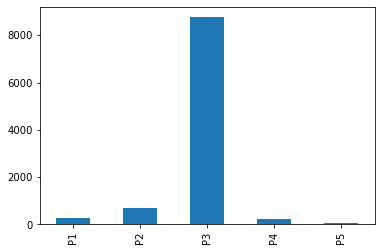

In [10]:
df_sample['Priority'].value_counts().sort_index().plot(kind='bar')

In [11]:
df_sample.columns

Index(['Issue_id', 'Priority', 'Component', 'Title', 'Description', 'Status',
       'Resolution', 'Version', 'Created_time', 'Resolved_time'],
      dtype='object')

In [12]:
df_sample = df_sample[['Title','Description','Priority']]

In [13]:
df_sample['Text'] = df_sample['Title'] + ' ' + df_sample['Description']

In [14]:
df_main = df_sample.drop(['Title','Description'],axis = 1)

In [15]:
df_main.head()

,Priority,Text
41404,P3,Error referring to @Generated annotation in ja...
14528,P3,Search-Java-References incorrectly identifies ...
31752,P3,JDT Debug failed to detect deadlock Not sure i...
4461,P1,new TestCase not always initialized correctly ...
38584,P2,[breadcrumb] Should not redraw when caret move...


In [16]:
df_main.shape

(9991, 2)

In [17]:
import re,html
def clean(text):
    #Convert html escapes like &amp; to charecters
    text = html.unescape(text)
    #tags like <tag>
    text = re.sub(r'<[^<>]*>', ' ',text)
    #Markdown Urls
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)',r'\1',str(text))
    #text or code in brackets
    text = re.sub(r'\[[^\[\]]*\]',' ',text)
    #Standalone sequences for specials
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ',text)
    #stand alone sequence of hyphens 
    text= re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ',text)
    # Sequence of white spaces
    text = re.sub(r'\s+',' ',text)
    return text.strip()

In [18]:
df_main['Text'] = df_main['Text'].apply(clean)

In [19]:
df_main = df_main[df_main['Text'].str.len() > 50]

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df_main.sample(2)

<ipython-input-20-bd8f39168b77>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Priority  \
6732  P2        
6090  P3        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [21]:
df_main.shape

(9949, 2)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(df_main['Text'],df_main['Priority'],test_size=0.2,
                                                random_state=42,stratify=df_main['Priority'])

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7959,)
(1990,)
(7959,)
(1990,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)

In [25]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0,tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

In [26]:
X_test_tf = tfidf.transform(X_test)

In [27]:
from sklearn.metrics import accuracy_score
Y_pred = model1.predict(X_test_tf)
print('Accuracy:', accuracy_score(Y_test,Y_pred))

Accuracy: 0.878391959798995


In [28]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train_tf,Y_train)

DummyClassifier(strategy='most_frequent')

In [29]:
Y_pred_baseline = clf.predict(X_test_tf)
print('Accuracy:', accuracy_score(Y_test,Y_pred_baseline))

Accuracy: 0.8768844221105527


In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
import matplotlib.pyplot as plt
confusion_matrix(Y_test,Y_pred)

array([[   5,    0,   45,    0,    0],
       [   0,    2,  130,    3,    0],
       [   2,    6, 1736,    1,    0],
       [   0,    2,   42,    5,    0],
       [   0,    0,   11,    0,    0]], dtype=int64)

C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


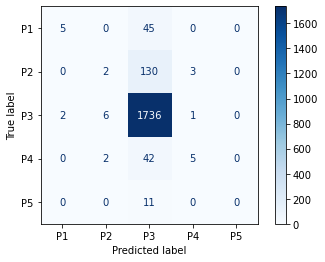

In [31]:
plot_confusion_matrix(model1,X_test_tf,Y_test,values_format='d',cmap=plt.cm.Blues)
plt.show()

In [32]:
#Precision for p3 values is correctly predicted p3 values divided by all predicted p3 values

p3_precison = 1722/(48+131+1722+47+11)
print("P3 Precision : ", p3_precison)

P3 Precision :  0.8790199081163859


In [33]:
# Recall for p3 values is correctly predicted p3 values divided by actual p3 values

p3_recall = 1722/(5+7+1722+4+0)
print("P3 Recall : ", p3_recall)

P3 Recall :  0.9907940161104718


In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          P1       0.71      0.10      0.18        50
          P2       0.20      0.01      0.03       135
          P3       0.88      0.99      0.94      1745
          P4       0.56      0.10      0.17        49
          P5       0.00      0.00      0.00        11

    accuracy                           0.88      1990
   macro avg       0.47      0.24      0.26      1990
weighted avg       0.82      0.88      0.83      1990



C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
df_main['Priority'].value_counts()

P3    8725
P2    674 
P1    248 
P4    246 
P5    56  
Name: Priority, dtype: int64

In [36]:
# OUR model is experience class imbalance as it has more records with P3 Category.

df_sampleP3 = df_main[df_main['Priority'] == 'P3'].sample(n=1000)

In [37]:
df_sampleRest = df_main[df_main['Priority'] != 'P3']

In [38]:
df_balanced = pd.concat([df_sampleRest,df_sampleP3])

In [39]:
df_balanced['Priority'].value_counts()

P3    1000
P2    674 
P1    248 
P4    246 
P5    56  
Name: Priority, dtype: int64

In [40]:
df_balanced.shape

(2224, 2)

In [41]:
df_balanced.head()

,Priority,Text
4461,P1,new TestCase not always initialized correctly It works for CUs but not for classes; Test Case: select class Test in the Packages view and create an new TestCase; ==> only superclass field is initialized
38584,P2,Should not redraw when caret moved in same element I20080806-1800; ; Even after bug 233510; the breadcrumb redraws too often: E.g. after the caret is moved in the same element; the whole breadcrumb is redrawn (post selection).; ; The breadcrumb should only update; a) on element change (reuse element change listener from Package Explorer; Outline; ...); b) on post selection in the editor when the enclosing element does not match the previous enclosing element
4443,P1,OpenExternalJavadoc action should not call findElement on JAR This causes an exception:; Java Model Exception: Java Model Status ; at org.eclipse.jdt.internal.core.JavaProject.findElement(JavaProject.java:435); at; org.eclipse.jdt.internal.ui.actions.OpenExternalJavadocAction.run(OpenExternalJavadocAction.java:102); at; org.eclipse.ui.texteditor.RetargetTextEditorAction.run(RetargetTextEditorAction.java:103); at org.eclipse.jface.action.Action.runWithEvent(Action.java:473); at; org.eclipse.jface.action.ActionContributionItem.handleWidgetSelection(ActionContributionItem.java:407); at; org.eclipse.jface.action.ActionContributionItem.handleWidgetEvent(ActionContributionItem.java(Compiled; Code)); at; org.eclipse.jface.action.ActionContributionItem$ActionListener.handleEvent(ActionContributionItem.java(Compiled; Code)); at; org.eclipse.jface.action.ActionContributionItem$ActionListener.handleEvent(ActionContributionItem.java(Compiled; Code)); at org.eclipse.swt.widgets.EventTable.sendEvent(EventTable.java(Compiled Code)); at org.eclipse.swt.widgets.Widget.notifyListeners(Widget.java(Compiled Code)); at org.eclipse.swt.widgets.Display.runDeferredEvents(Display.java(Compiled Code)); at org.eclipse.swt.widgets.Display.readAndDispatch(Display.java(Compiled Code)); at org.eclipse.ui.internal.Workbench.runEventLoop(Workbench.java(Compiled Code)); at org.eclipse.ui.internal.Workbench.run(Workbench.java:698); at org.eclipse.core.internal.boot.InternalBootLoader.run(InternalBootLoader.java:777); at org.eclipse.core.boot.BootLoader.run(BootLoader.java:319); at java.lang.reflect.Method.invoke(Native Method); at org.eclipse.core.launcher.Main.basicRun(Main.java:196); at org.eclipse.core.launcher.Main.run(Main.java:555); at org.eclipse.core.launcher.UIMain.main(UIMain.java:52); 4 org.eclipse.jdt.core 979 Invalid path: C:/Java/IBM1.3/jre/lib/rt.jar.
22123,P4,Displaying XML string variable with mouseover popup strips XML tags In the debugger a string variable contains a XML string. When I mouse over ; the pop up displays the content of the inner most tag. To display the entire ; string I have to inspect the variable. This is not what I would expect and we ; spent some time trying to figure out why the xml tags where missing when they ; really werent.
3788,P2,Problems with StructuredSelectionProvider.createFrom(ISelectionProvider) Build 20020224; ; StructuredSelectionProvider.createFrom(ISelectionProvider) does not work if the; provider is an editor.; This is because; a)line 132 reads:; if (result instanceof ITextSelection fProvider instanceof IEditorPart); ==> tests if the provider is an IEditorPart; b) The editor part isnt a selection provider; c) the selection provider of an editor is the source viewer; ==> no code resolve will be done and the structured selection is empty


In [42]:
df_balanced.isnull().sum()

Priority    0
Text        0
dtype: int64

In [43]:
df_balanced['Text'] = df_balanced['Text'].apply(clean)

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(df_balanced['Text'],df_balanced['Priority'],test_size=0.2,
                                                random_state=42,stratify=df_balanced['Priority'])

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1779,)
(445,)
(1779,)
(445,)


In [46]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)

In [47]:
model1 = LinearSVC(random_state=0,tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

In [48]:
X_test_tf = tfidf.transform(X_test)

In [49]:
Y_pred = model1.predict(X_test_tf)
print('Accuracy:', accuracy_score(Y_test,Y_pred))

Accuracy: 0.47415730337078654


In [50]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          P1       0.53      0.42      0.47        50
          P2       0.37      0.39      0.38       135
          P3       0.53      0.62      0.57       200
          P4       0.45      0.27      0.33        49
          P5       0.00      0.00      0.00        11

    accuracy                           0.47       445
   macro avg       0.38      0.34      0.35       445
weighted avg       0.46      0.47      0.46       445



In [51]:
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train_tf,Y_train)

DummyClassifier(strategy='most_frequent')

In [52]:
Y_pred_baseline = clf.predict(X_test_tf)
print('Accuracy:', accuracy_score(Y_test,Y_pred_baseline))

Accuracy: 0.449438202247191


In [53]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words='english')
df_tf = tfidf.fit_transform(df_balanced['Text']).toarray()

In [58]:
from sklearn.model_selection import cross_val_score,GridSearchCV
scores = cross_val_score(estimator=model1,X=df_tf,y=df_balanced['Priority'],cv=5)

In [59]:
print("Validation scores for each iteration:",scores)
print("Mean:",scores.mean())
print("std:",scores.std())

Validation scores for each iteration: [0.50337079 0.48314607 0.50337079 0.51910112 0.49774775]
Mean: 0.5013473023585384
std: 0.011555335491723794


# GridSearchCV

In [83]:
from sklearn.pipeline import Pipeline
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words='english')),
            ('model', LinearSVC(random_state=42,tol = 1e-5))])

In [84]:
grid_param = [{
    'tfidf__min_df': [5,10],
    'tfidf__ngram_range': [(1,3),(1,6)],
    'model__penalty': ['12'],
    'model__loss': ['hinge'],
    'model__max_iter': [10000]
    },{
    'tfidf__min_df': [5,10],
    'tfidf__ngram_range': [(1,3),(1,6)],
    'model__C': [1,10],
    'model__tol':[1e-2, 1e-3]
}]

In [85]:
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,param_grid=grid_param,cv=5)

In [86]:
gridSearchProcessor.fit(df_balanced['Text'],df_balanced['Priority'])

C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Akash Guje\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('model',
                                        LinearSVC(random_state=42,
                                                  tol=1e-05))]),
             param_grid=[{'model__loss': ['hinge'], 'model__max_iter': [10000],
                          'model__penalty': ['12'], 'tfidf__min_df': [5, 10],
                          'tfidf__ngram_range': [(1, 3), (1, 6)]},
                         {'model__C': [1, 10], 'model__tol': [0.01, 0.001],
                          'tfidf__min_df': [5, 10],
                          'tfidf__ngram_range': [(1, 3), (1, 6)]}])

In [87]:
best_params = gridSearchProcessor.best_params_
print('Best Parameter:',best_params)

Best Parameter: {'model__C': 1, 'model__tol': 0.01, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 6)}


In [88]:
best_result = gridSearchProcessor.best_score_
print('Best Result:',best_result)

Best Result: 0.5130387691061847


In [89]:
gridSearchResults = pd.DataFrame(gridSearchProcessor.cv_results_)

In [90]:
gridSearchResults[['rank_test_score','mean_test_score','params']].sort_values(by=['rank_test_score'])[:5]

,rank_test_score,mean_test_score,params
11,1,0.513039,"{'model__C': 1, 'model__tol': 0.001, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 6)}"
7,1,0.513039,"{'model__C': 1, 'model__tol': 0.01, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 6)}"
6,3,0.511242,"{'model__C': 1, 'model__tol': 0.01, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 3)}"
10,4,0.510793,"{'model__C': 1, 'model__tol': 0.001, 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 3)}"
5,5,0.497299,"{'model__C': 1, 'model__tol': 0.01, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}"
